# 📦 Smart Inventory Optimization in Retail Chains

**Objective**: Predict product demand across retail stores using historical data to help optimize inventory levels.

---


In [ ]:
# ✅ Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# ✅ Step 2: Load Dataset

df = pd.read_csv("sales_data.csv")
df.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [ ]:
# ✅ Step 3: Data Preprocessing

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract new date-based features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek

# Drop the original 'Date' column
df.drop('Date', axis=1, inplace=True)

# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Store ID'] = le.fit_transform(df['Store ID'])
df['Product ID'] = le.fit_transform(df['Product ID'])
df['Category'] = le.fit_transform(df['Category'])
df['Region'] = le.fit_transform(df['Region'])

# One-hot encode weather condition and seasonality
df = pd.get_dummies(df, columns=['Weather Condition', 'Seasonality'], drop_first=True)

# Confirm structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Store ID                 76000 non-null  int64  
 1   Product ID               76000 non-null  int64  
 2   Category                 76000 non-null  int64  
 3   Region                   76000 non-null  int64  
 4   Inventory Level          76000 non-null  int64  
 5   Units Sold               76000 non-null  int64  
 6   Units Ordered            76000 non-null  int64  
 7   Price                    76000 non-null  float64
 8   Discount                 76000 non-null  int64  
 9   Promotion                76000 non-null  int64  
 10  Competitor Pricing       76000 non-null  float64
 11  Epidemic                 76000 non-null  int64  
 12  Demand                   76000 non-null  int64  
 13  Month                    76000 non-null  int32  
 14  Day                   

## 📊 Step 4: Exploratory Data Analysis (EDA)
Understanding the data with visualizations.


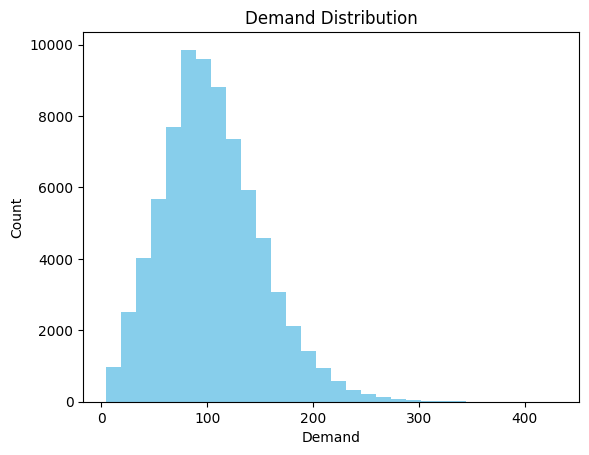

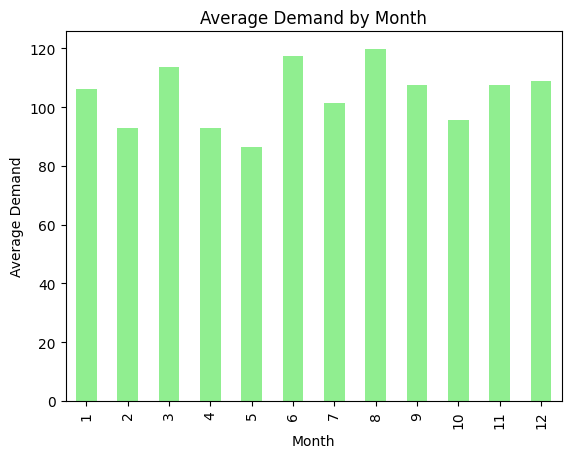

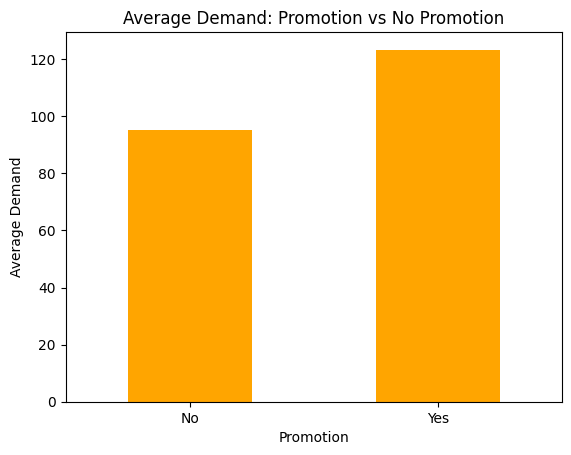

Sunny  ➤ 115.16718885987815
Rainy  ➤ 95.10674285714286
Snowy  ➤ 94.04578853046596


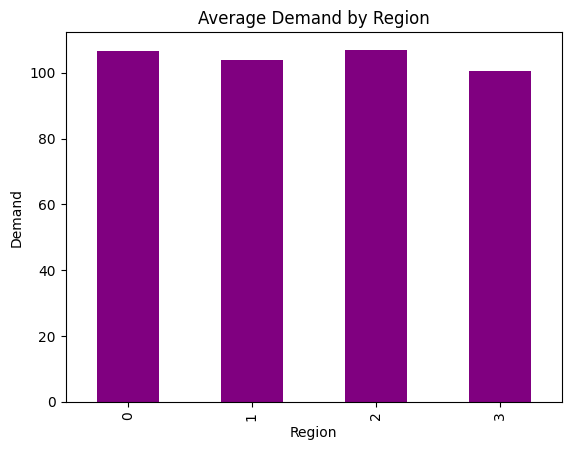

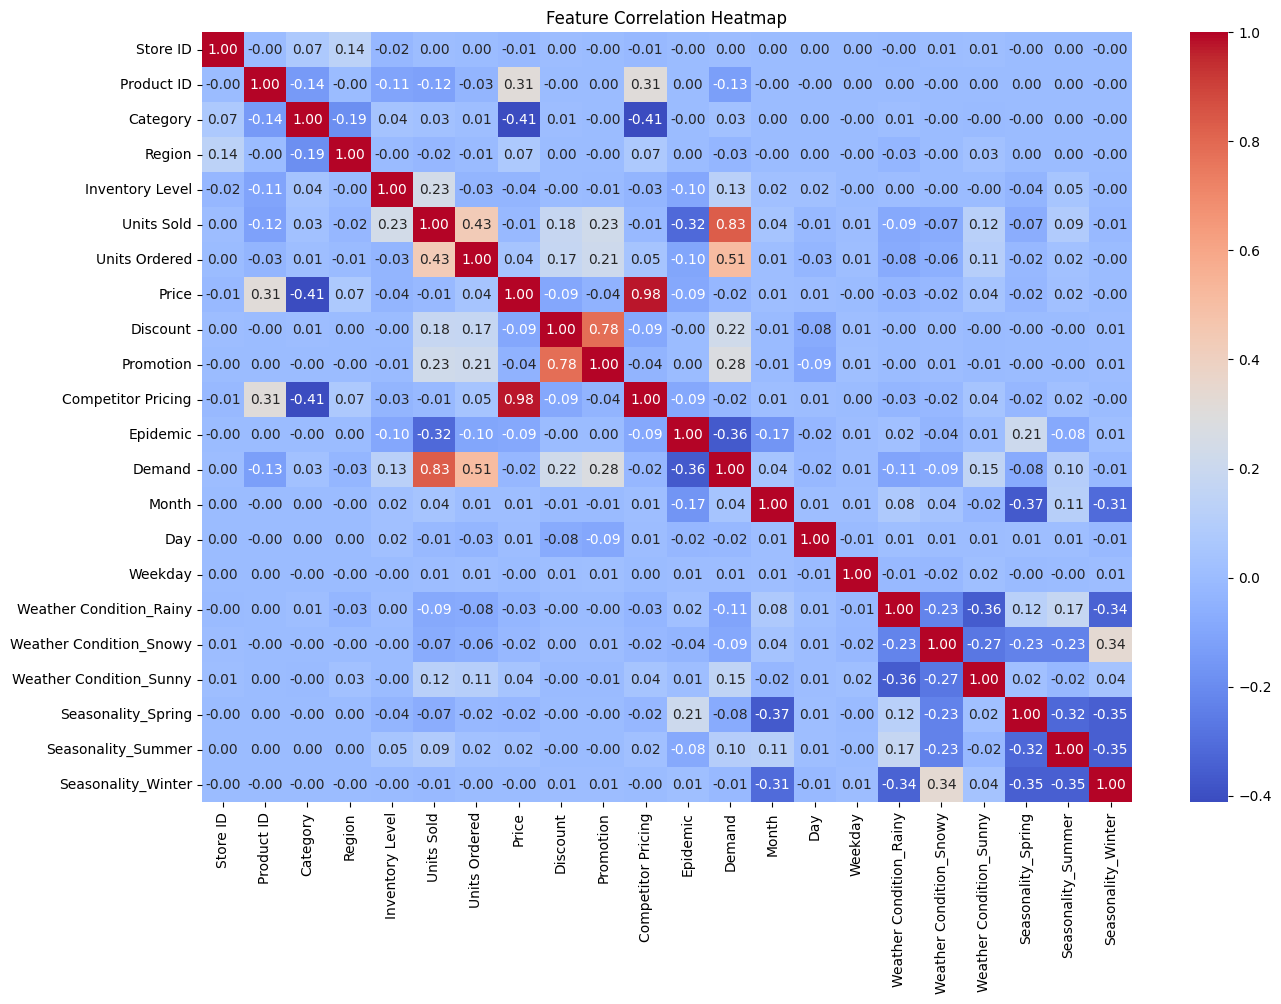

In [ ]:
# 4.1 Demand Distribution
plt.hist(df['Demand'], bins=30, color='skyblue')
plt.title('Demand Distribution')
plt.xlabel('Demand')
plt.ylabel('Count')
plt.show()

# 4.2 Average Demand by Month
df.groupby('Month')['Demand'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Demand by Month')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.show()

# 4.3 Promotion Impact on Demand
df.groupby('Promotion')['Demand'].mean().plot(kind='bar', color='orange')
plt.title('Average Demand: Promotion vs No Promotion')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('Average Demand')
plt.show()

# 4.4 Demand by Weather
print("Sunny  ➤", df[df['Weather Condition_Sunny']==1]['Demand'].mean())
print("Rainy  ➤", df[df['Weather Condition_Rainy']==1]['Demand'].mean())
print("Snowy  ➤", df[df['Weather Condition_Snowy']==1]['Demand'].mean())

# 4.5 Demand by Region
df.groupby('Region')['Demand'].mean().plot(kind='bar', color='purple')
plt.title('Average Demand by Region')
plt.xlabel('Region')
plt.ylabel('Demand')
plt.show()

# 4.6 Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## 🧮 Step 5: Define Features and Target


In [ ]:
X = df.drop('Demand', axis=1)
y = df['Demand']


## 🧪 Step 6: Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 📈 Step 7: Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression R²:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)


Linear Regression R²: 0.7561635230449839
Linear Regression RMSE: 23.20596261657115


## 🌳 Step 8: Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest R²:", r2_rf)
print("Random Forest RMSE:", rmse_rf)
from sklearn.tree import DecisionTreeRegressor

Random Forest R²: 0.8688993502066062
Random Forest RMSE: 17.015811780208246


## 📊 Step 9: Model Comparison — Linear Regression vs Random Forest


In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

comparison_df


,Model,R² Score,RMSE
0,Linear Regression,0.756164,23.205963
1,Random Forest,0.868899,17.015812


## 🔁 Step 10: Cross-Validation


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.86726159 0.8692875  0.86621458 0.86975855 0.87155377]
Average CV R² Score: 0.8688151950706138


## 🔍 Step 11: Hyperparameter Tuning using Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## ⭐ Step 11: Feature Importance


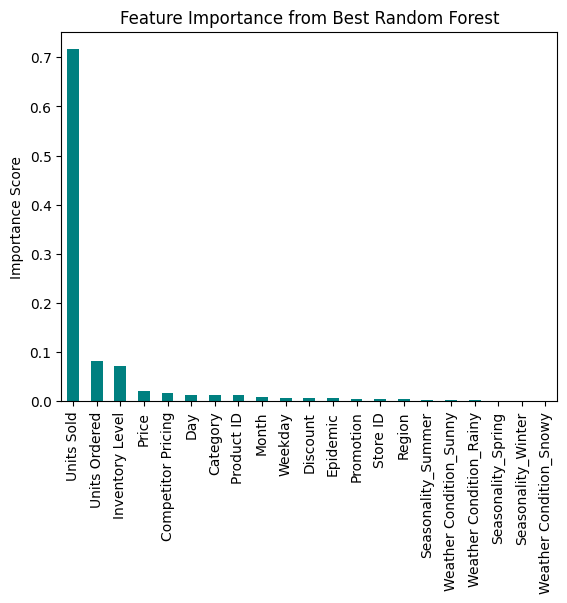

In [ ]:
feat_importance = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance from Best Random Forest")
plt.ylabel("Importance Score")
plt.show()


## 💾 Step 12: Save the Model for Streamlit Deployment


In [6]:
import joblib

# Save model ONLY
joblib.dump(best_rf, "models/model_only.pkl", compress=3)

# Save feature order ONLY
joblib.dump(X.columns.tolist(), "models/features_only.pkl")

print("✅ Model and features saved separately in 'models/' folder")


NameError: name 'best_rf' is not defined

['demand_model_compressed.pkl']